In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../artifacts/sentiment_analysis.csv")

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

# ##Text Preprocessing

In [7]:
import re
import string

In [8]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

convert uppercase to lowercase

In [9]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join(x.lower() for x in x.split())) 

In [10]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [11]:
data["tweet"].head(7)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
Name: tweet, dtype: object

# remove links

In [12]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join(re.sub(r'^https?:\/\/.*[\r\n]*','',x, flags=re.MULTILINE) for x in x.split()))

In [13]:
data["tweet"].head(7)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
Name: tweet, dtype: object

Remove punctuations

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
        return text

data['tweet'] = data['tweet'].apply(remove_punctuations)

In [16]:
data["tweet"].head(7)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this would you go? #talk #makememories...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service apple won't even talk to ...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
Name: tweet, dtype: object

In [17]:
data["tweet"].head(7)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this would you go? #talk #makememories...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service apple won't even talk to ...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
Name: tweet, dtype: object

In [18]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)


In [19]:
data["tweet"].head(7)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
5    iphone software update fucked up my phone big ...
6    happy for us  instapic instadaily us sony xper...
Name: tweet, dtype: object

In [20]:
data["tweet"].tail(7)

7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

# remove numbers

In [30]:
data['tweet'] = data['tweet'].str.replace('\d+','',regex=True)

In [33]:
data["tweet"].tail(7)

7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [34]:
!pip install nltk

In [35]:
import nltk

In [36]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()


In [38]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in sw)) 

Stemming

In [26]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [42]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [43]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [44]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


# Building vocabulary

In [45]:
from collections import Counter
vocab = Counter()


In [46]:
vocab

Counter()

In [47]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [48]:
len(vocab)


15949

In [49]:
data.shape

(7920, 3)

In [50]:
 tokens = [key for key in vocab if vocab[key] > 10]

In [51]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [52]:
len(tokens)

1145

In [53]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

# Divide dataset

In [54]:
X = data['tweet']
y = data['label']

In [55]:
!pip install scikit-learn

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
X_train

1346    never loath compani much loath appl moneysucki...
1581         lol iphon convers babe deal weird thing come
811                welcom back life ive miss dearli iphon
3241     appl perfect want relinquish control live corpor
2634       love phone decid stop text peopl back work grr
                              ...                        
4572    jailbrok iphon love good app cydina httpcligsg...
5176    dear att love unlimit data plan sloooooow go g...
588     happi announc entir storeus coupon code crosss...
2879    gain follow rt must follow follow back follow ...
5956         serious miss year crappi blackberri iphon xx
Name: tweet, Length: 6336, dtype: object

In [58]:
X_test

573     lesson download font free io design photo lear...
4562    wow fabul new onetouch product present soni on...
7521    boy tygooseman mattgoosen besti parti jj picof...
2367    also help vote solehop makeadiffer solehop hop...
3595    repost wallofwallstreet via crowdfir look bore...
                              ...                        
3536    phone case arriv cheer yay phone phonecas soni...
5532    haha need parent never answer phone funni ipho...
5923    looov maiacherri gifboom pictur iphon popularp...
525     im happi girl galaxi teamgalaxi teamandroid sa...
599     scottiwata your say peopl microwav ipad total ...
Name: tweet, Length: 1584, dtype: object

In [59]:
y_train

1346    1
1581    0
811     0
3241    1
2634    1
       ..
4572    0
5176    0
588     0
2879    0
5956    0
Name: label, Length: 6336, dtype: int64

In [52]:
y_test

623     0
58      1
2189    0
2002    0
4084    0
       ..
5968    0
5670    0
268     0
5227    0
4160    0
Name: label, Length: 1584, dtype: int64

# vectorization

In [60]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [61]:
vectorized_x_train=vectorizer(X_train,tokens)

In [62]:
vectorized_x_test=vectorizer(X_test,tokens)

In [63]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
y_train

1346    1
1581    0
811     0
3241    1
2634    1
       ..
4572    0
5176    0
588     0
2879    0
5956    0
Name: label, Length: 6336, dtype: int64

In [65]:
vectorized_x_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
y_test

573     0
4562    0
7521    0
2367    0
3595    0
       ..
3536    0
5532    0
5923    0
525     0
599     1
Name: label, Length: 1584, dtype: int64

In [67]:
y_train.value_counts()

label
0    4698
1    1638
Name: count, dtype: int64

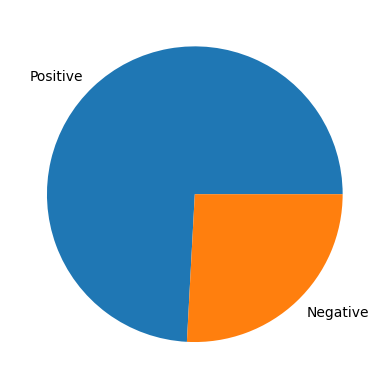

In [68]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

# handle imbalanced dataset

In [69]:
!pip install imbalanced-learn

In [70]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9396, 1145) (9396,)


In [71]:
y_train_smote.value_counts()

label
1    4698
0    4698
Name: count, dtype: int64

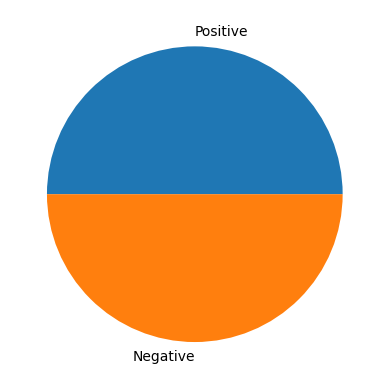

In [72]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [73]:
vectorized_x_train_smote

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.5045511, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [74]:
y_train_smote

0       1
1       0
2       0
3       1
4       1
       ..
9391    1
9392    1
9393    1
9394    1
9395    1
Name: label, Length: 9396, dtype: int64

In [75]:
vectorized_x_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [76]:
y_test

573     0
4562    0
7521    0
2367    0
3595    0
       ..
3536    0
5532    0
5923    0
525     0
599     1
Name: label, Length: 1584, dtype: int64

# model training and evaluation

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [80]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

# logistic regression

In [81]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.939
	Precision = 0.916
	Recall = 0.966
	F1-Score = 0.94
Testing Scores:
	Accuracy = 0.876
	Precision = 0.703
	Recall = 0.858
	F1-Score = 0.773


# naive bayes

In [82]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.906
	Precision = 0.867
	Recall = 0.959
	F1-Score = 0.911
Testing Scores:
	Accuracy = 0.872
	Precision = 0.672
	Recall = 0.933
	F1-Score = 0.781


# Decision Tree

In [83]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.827
	Precision = 0.647
	Recall = 0.647
	F1-Score = 0.647


# Random Forest

In [86]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.867
	Precision = 0.731
	Recall = 0.722
	F1-Score = 0.726


# Support Vector Machine

In [91]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.962
	Recall = 0.996
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.888
	Precision = 0.743
	Recall = 0.827
	F1-Score = 0.783


In [92]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)